# Contents:

#### Import libraries
#### Importing data
#### Data cleaning
#### Data Exploration

## 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import os

## 02 Importing Data 

In [2]:
path=r'C:\Users\61491\Achievement 6'

In [3]:
df = pd.read_csv(r'C:\Users\61491\Achievement 6\02 Data\Prepared Data\energy_checked.csv', index_col = False)

## 03 Data Cleaning

In [4]:
df.head(5)

,Country,Year,Energy type,Energy consumption,Energy production,GDP,Population,CO2 emission
0,Afghanistan,2000,All energy types,0.020178,0.011707,20.5799,20780.0,1.253149
1,Afghanistan,2000,coal,0.000021,0.000020,20.5799,20780.0,0.001944
2,Afghanistan,2000,Natural gas,0.008504,0.008504,20.5799,20780.0,0.451205
3,Afghanistan,2000,Petroleum & Liquids,0.008129,0.000000,20.5799,20780.0,0.800000
4,Afghanistan,2000,nuclear,0.000000,0.000000,20.5799,20780.0,0.000000


In [5]:
df.columns

Index(['Country', 'Year', 'Energy type', 'Energy consumption',
       'Energy production', 'GDP', 'Population', 'CO2 emission'],
      dtype='object')

In [6]:
df.shape

(22680, 8)

In [7]:
df.describe()

,Year,Energy consumption,Energy production,GDP,Population,CO2 emission
count,22680.000000,22680.000000,2.268000e+04,22680.000000,2.268000e+04,22680.000000
mean,2009.500000,0.894156,8.878043e-01,498.085813,3.645739e+04,53.537171
std,5.766408,5.447661,5.011072e+00,1722.175862,1.371149e+05,384.717094
min,2000.000000,-0.163438,-1.000000e-39,0.161470,2.031300e+01,-0.000138
25%,2004.750000,0.000000,0.000000e+00,14.516975,2.052620e+03,0.000000
50%,2009.500000,0.022327,3.520950e-04,58.428250,7.622975e+03,0.101067
75%,2014.250000,0.239846,1.187332e-01,306.232075,2.477240e+04,8.897328
max,2019.000000,151.608886,1.235914e+02,23128.340000,1.434512e+06,10732.002370


In [8]:
df.dtypes

Country                object
Year                    int64
Energy type            object
Energy consumption    float64
Energy production     float64
GDP                   float64
Population            float64
CO2 emission          float64
dtype: object

In [9]:
# finding missing values
df.isnull().sum()

Country               0
Year                  0
Energy type           0
Energy consumption    0
Energy production     0
GDP                   0
Population            0
CO2 emission          0
dtype: int64

There no missing values in the data set

In [10]:
# finding duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22675    False
22676    False
22677    False
22678    False
22679    False
Length: 22680, dtype: bool

The data set does not contain any duplicates

In [11]:
# finding mixed type data
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col, ' mixed')
  else: print(col, ' consistent')

Country  consistent
Year  consistent
Energy type  consistent
Energy consumption  consistent
Energy production  consistent
GDP  consistent
Population  consistent
CO2 emission  consistent


There is no mixed-type data in all columns

## 04 Data Exploration

#### Correlations

In [12]:
df.corr()

,Year,Energy consumption,Energy production,GDP,Population,CO2 emission
Year,1.000000,0.020653,0.022827,0.057481,0.018379,0.018244
Energy consumption,0.020653,1.000000,0.926605,0.656582,0.473034,0.976201
Energy production,0.022827,0.926605,1.000000,0.580078,0.424372,0.905128
GDP,0.057481,0.656582,0.580078,1.000000,0.674885,0.594924
Population,0.018379,0.473034,0.424372,0.674885,1.000000,0.471818
CO2 emission,0.018244,0.976201,0.905128,0.594924,0.471818,1.000000


In [13]:
df.columns

Index(['Country', 'Year', 'Energy type', 'Energy consumption',
       'Energy production', 'GDP', 'Population', 'CO2 emission'],
      dtype='object')

In [14]:
# Create a subset excluding  country and year
sub = df[['Energy type', 'Energy consumption', 'Energy production', 'GDP', 'Population', 'CO2 emission']]

In [15]:
sub

,Energy type,Energy consumption,Energy production,GDP,Population,CO2 emission
0,All energy types,0.020178,0.011707,20.5799,20780.0,1.253149
1,coal,0.000021,0.000020,20.5799,20780.0,0.001944
2,Natural gas,0.008504,0.008504,20.5799,20780.0,0.451205
3,Petroleum & Liquids,0.008129,0.000000,20.5799,20780.0,0.800000
4,nuclear,0.000000,0.000000,20.5799,20780.0,0.000000
...,...,...,...,...,...,...
22675,coal,0.045064,0.075963,37.6204,14654.2,4.586869
22676,Natural gas,0.000000,0.000000,37.6204,14654.2,0.000000
22677,Petroleum & Liquids,0.055498,0.000000,37.6204,14654.2,4.377890
22678,nuclear,0.000000,0.000000,37.6204,14654.2,0.000000


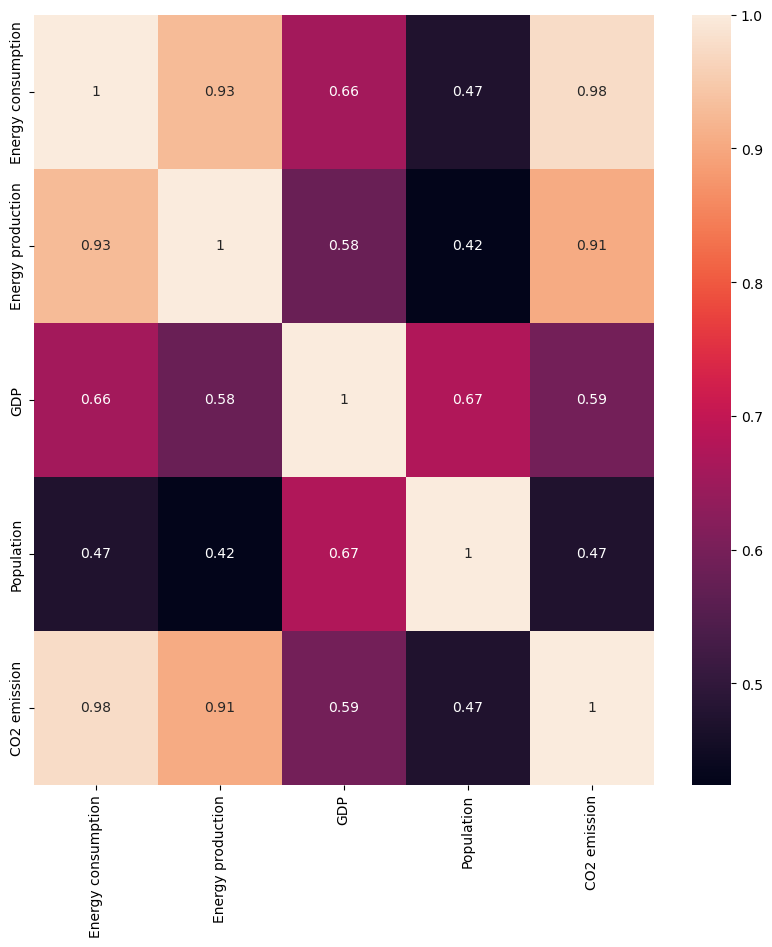

In [16]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Create the correlation heatmap in seaborn 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

There is a strong relationship between Energy consumption and CO2 emissions meaning the higher the enrgy consumption the more CO2 emissins are released from the use of fossil fuels. Energy production and Energy consumption also have a very strong relationship meaning a higher consumption leads to a higher production and a highe GDP leads to high energy consumption and production and in turn CO2 emissions.

#### Scatterplots

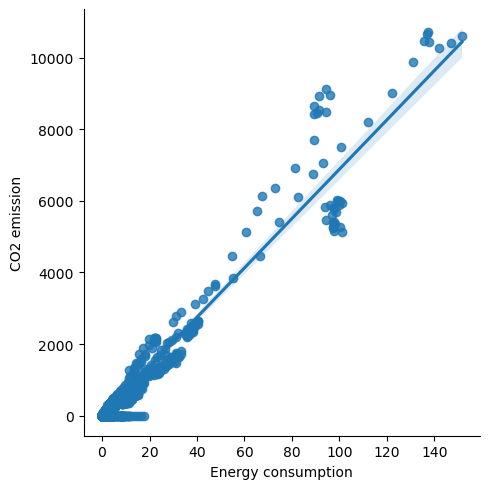

In [17]:
# Create a scatterplot for Energy consumption and CO2 emissions
sns.lmplot(x = 'Energy consumption', y = 'CO2 emission', data = df)

AS Energy consumption incereases CO2 emissions also increases

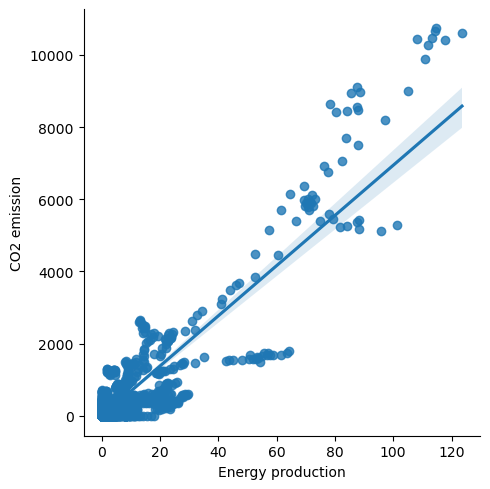

In [18]:
# Create a scatterplot for Energy production and CO2 emissions
sns.lmplot(x = 'Energy production', y = 'CO2 emission', data = df)

The higher the Energy production of a country, the more CO2 emissions are produced

#### Pair Plots

C:\Users\61491\AppData\Local\Temp\ipykernel_5108\813143878.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_pp = df[df['Country']=='World'][df['Energy type']!='all']


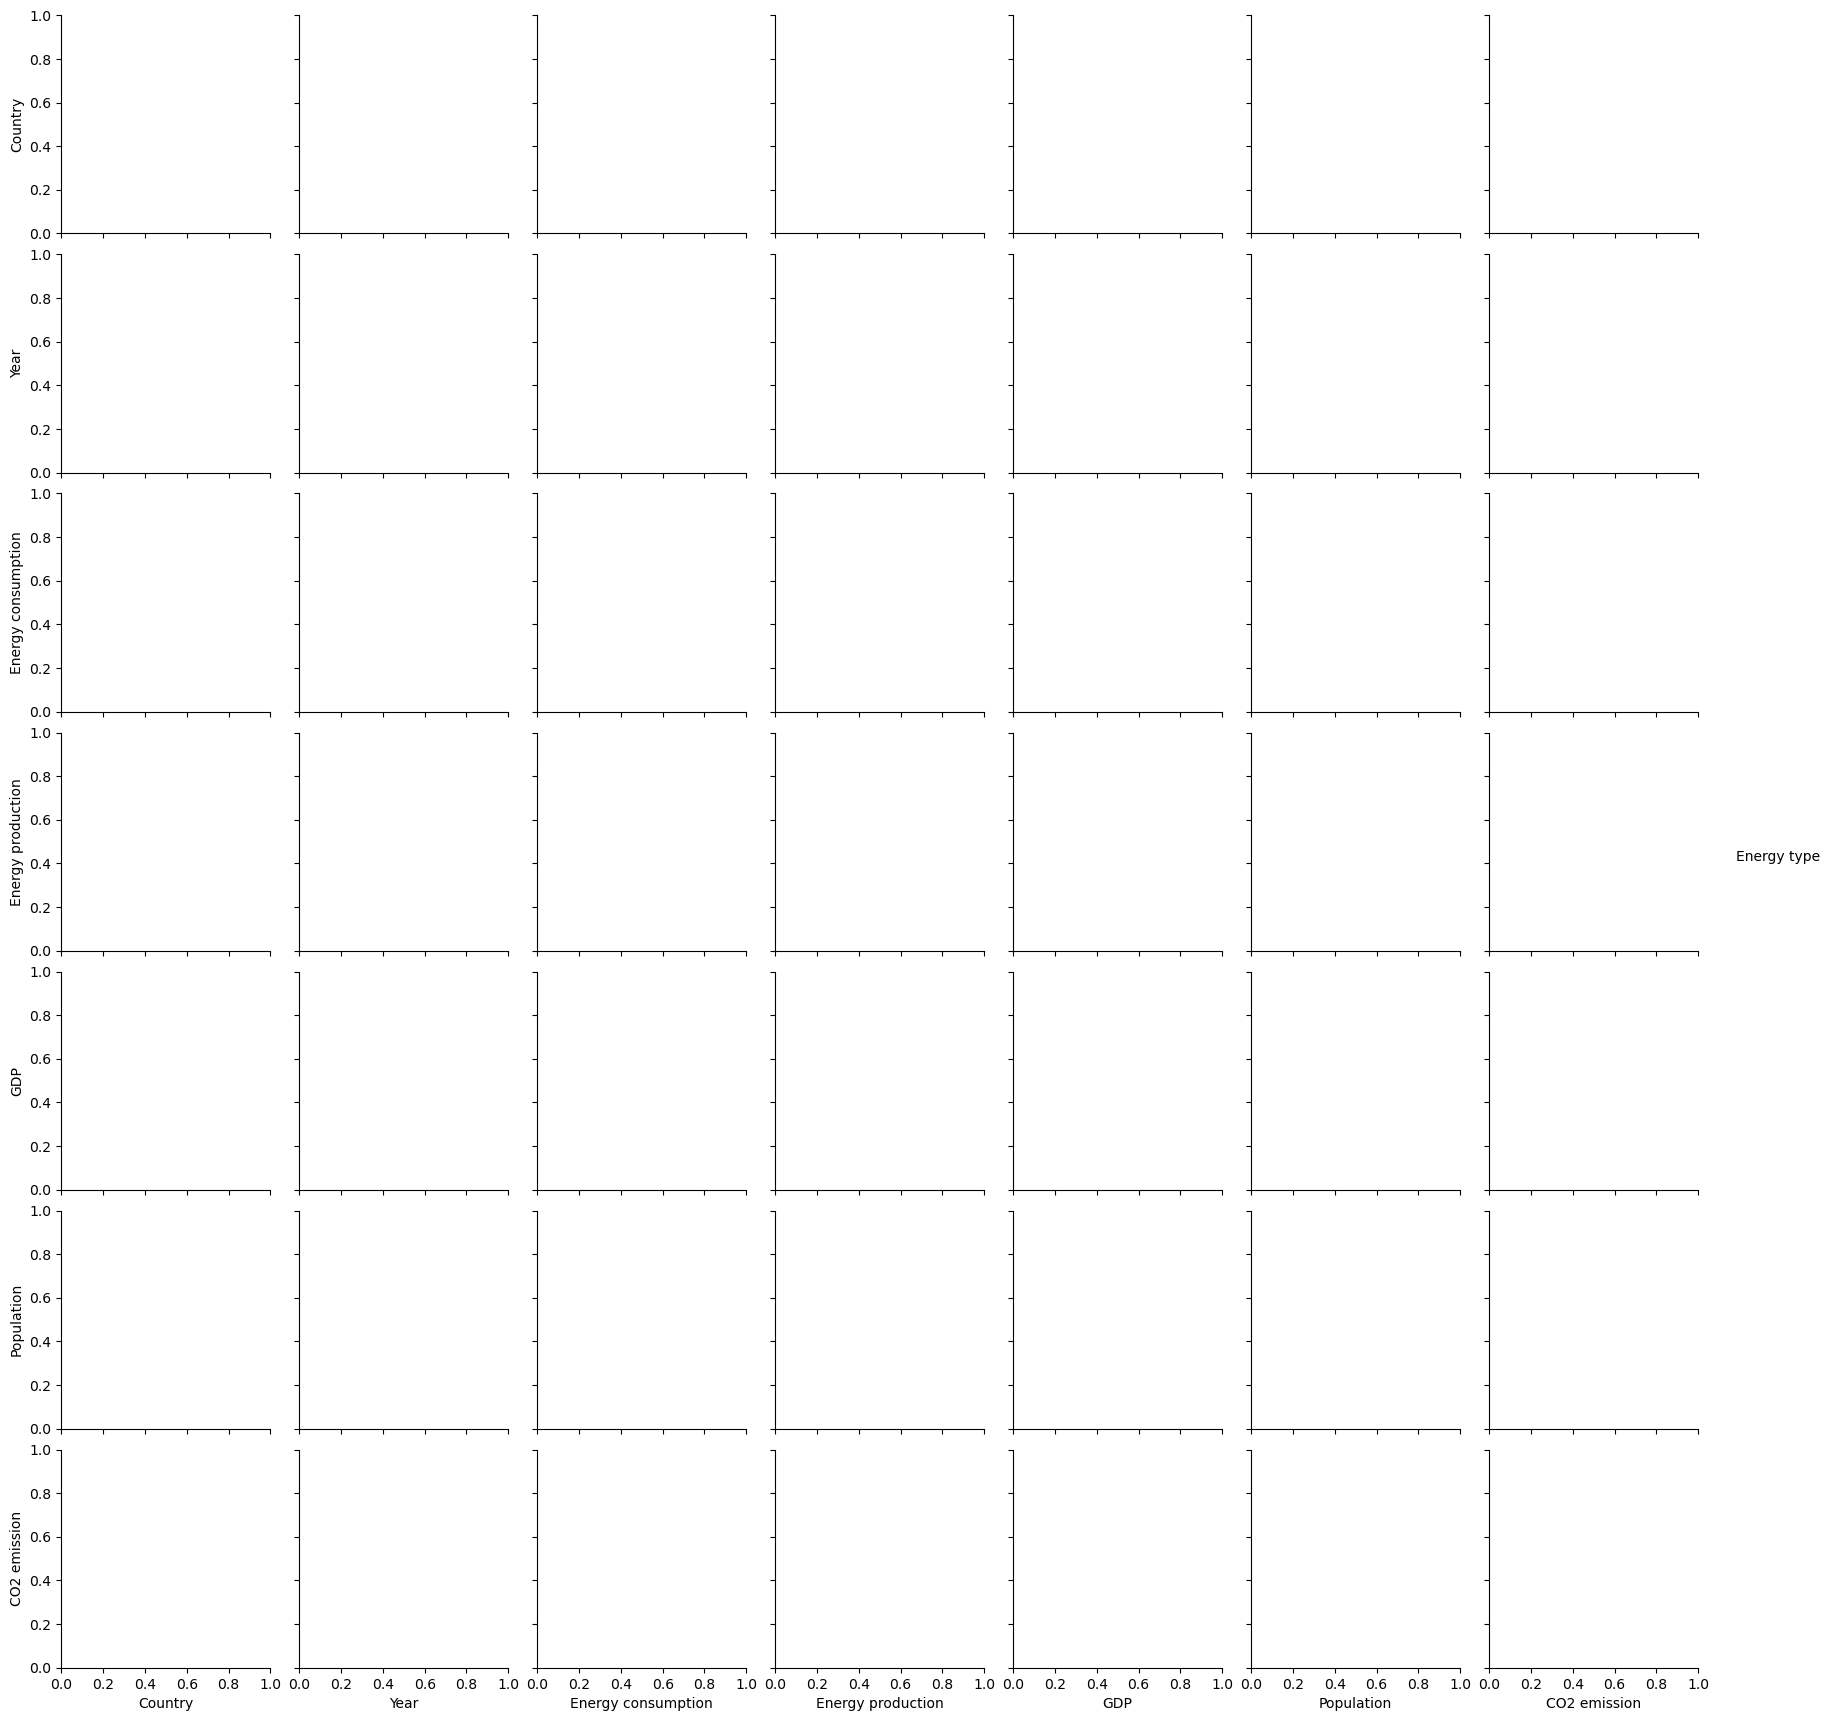

In [19]:
temp_pp = df[df['Country']=='World'][df['Energy type']!='all']
sns.pairplot(temp_pp, hue='Energy type',palette="inferno")
plt.show()

Energy consumption, Energy production, CO2 emissions and GDP seem to have a positive relationship which can be further analysed.

#### Categorical Plots

<AxesSubplot:xlabel='CO2 emission', ylabel='Count'>

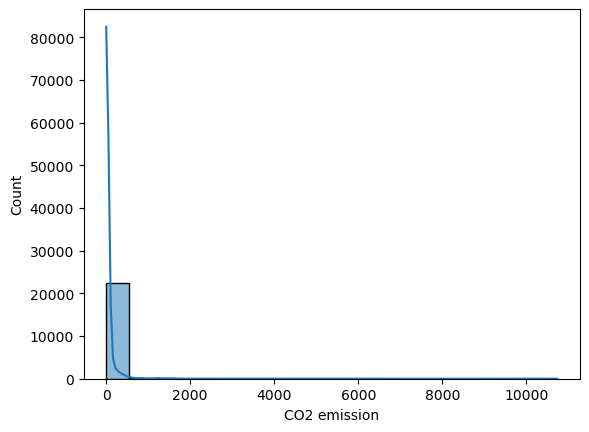

In [20]:
sns.histplot(df['CO2 emission'], bins = 20, kde = True)

### Project Questions

#### 1) What is the relationship between energy production and CO2 emissions?

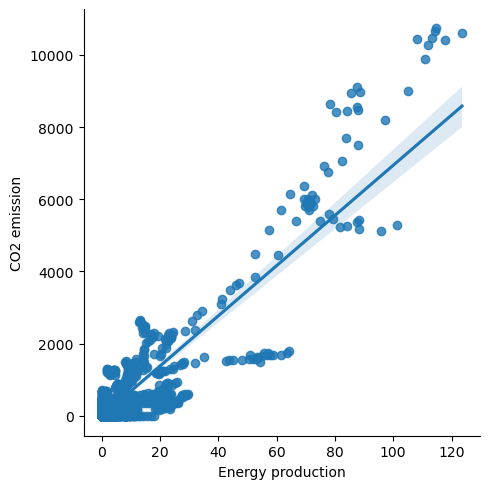

In [21]:
sns.lmplot(x = 'Energy production', y = 'CO2 emission', data = df)

Energy production has a strong relationship with CO2 emission, as Energy production increases so does CO2 emission

### Other Questions
#### Which countries consume the most clean energy?
#### What energy types are produced by the top 5 countries

### Hypothesis

High energy consumption leads to high CO2 emissions. If a country has high energy consumption, then the CO2 emissions are high. 